## Exploratory Data Analysis on Student Result

### Problem Statement:


# 1.Download the data
1.Find the appropriate data sets.

2.Make sure the data set informations are adequate.

3.Download the data

## 2. Data Preparation and Cleaning
1)Load the required data set using pandas.

2)Extract the required numerical informations.

3)Extract the categorical informations.

3)Fix the problems related with missing values, erros and other issues related with the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv(r"C:\Users\jaabir\Downloads\archive (9)/Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## 3.Performing data check on the dataset

In [11]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [12]:
df.shape

(30641, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [15]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Drop Unnamed Column

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## 4. Performing Exploratory Data Analysis

### Gender Distribution

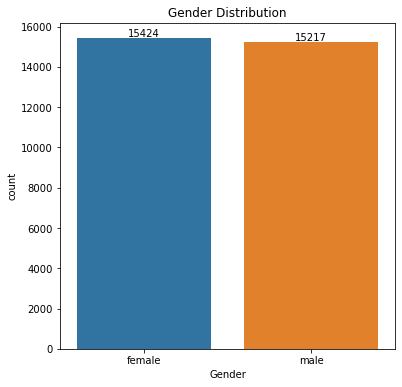

In [40]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

##### From the above chart its obvious that number of females are more than the males in data

### Transport Means Distribution

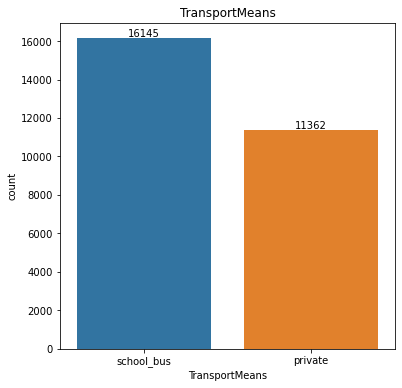

In [90]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=df,x='TransportMeans')
ax.bar_label(ax.containers[0])
plt.title("TransportMeans")
plt.show()

#### Most of the students travel by school bus

### Parental Education Vs Student score

In [33]:
gbped=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gbped

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


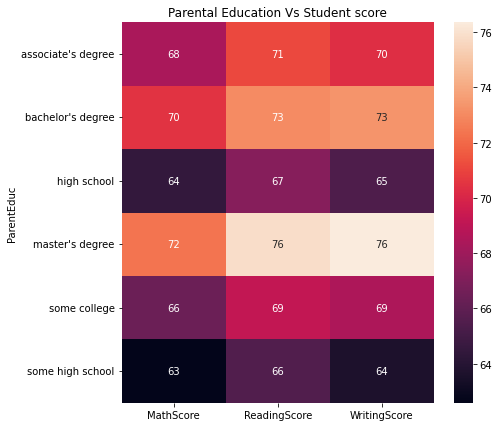

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(gbped, annot=True)
plt.title("Parental Education Vs Student score")
plt.show()

#### From the above chart, we have concluded that parent education has great impact on student scores


### Parental Marital Status Vs Student score

In [38]:
gbpms=df.groupby("ParentMaritalStatus").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gbpms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


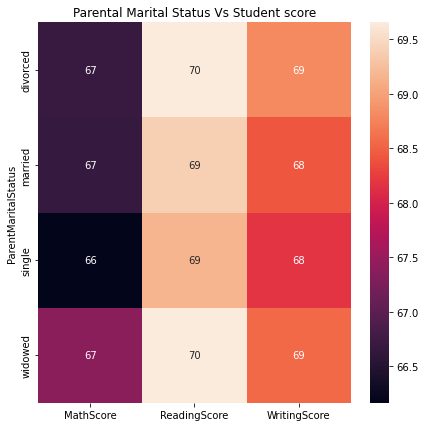

In [43]:
plt.figure(figsize=(7,7))
sns.heatmap(gbpms, annot=True)
plt.title("Parental Marital Status Vs Student score")
plt.show()

#### We have concluded from the above chart that parent marital status hasn't got much impact on student scores 

### Weekly Study Hours Vs Students Score 

In [87]:
gbwsh=df.groupby("WklyStudyHours").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gbwsh

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


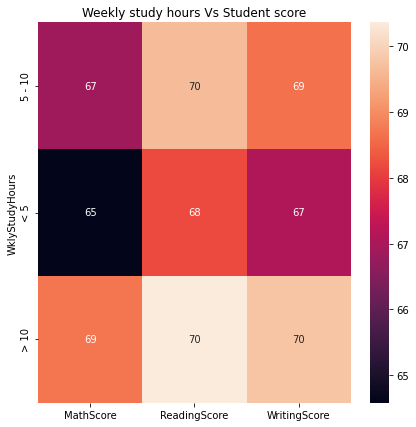

In [88]:
plt.figure(figsize=(7,7))
sns.heatmap(gbwsh, annot=True)
plt.title("Weekly study hours Vs Student score")
plt.show()

#### We can conclude that study time is directly propotional to scores

### Ethnic group distribution---Count plot

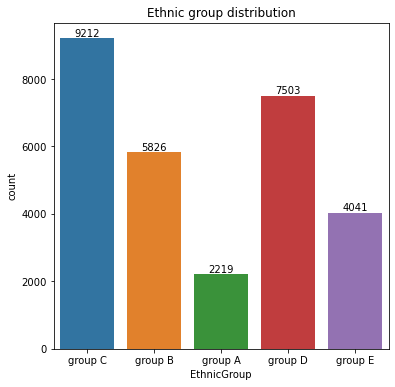

In [72]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])
plt.title("Ethnic group distribution")
plt.show()

In [54]:
ethnic=df['EthnicGroup'].unique()
ethnic

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

### Ethnic Grop Distribution----Pie chart

In [74]:
CountA=df[df['EthnicGroup']=="group A"].shape[0]
CountB=df[df['EthnicGroup']=="group B"].shape[0]
CountC=df[df['EthnicGroup']=="group C"].shape[0]
CountD=df[df['EthnicGroup']=="group D"].shape[0]
CountE=df[df['EthnicGroup']=="group E"].shape[0]
mlist=[CountA,CountB,CountC,CountD,CountE]
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]
mlist

[2219, 5826, 9212, 7503, 4041]

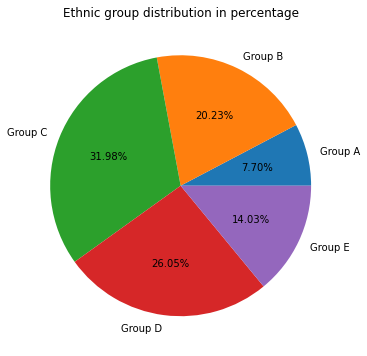

In [79]:
plt.figure(figsize=(6,6))

plt.pie(mlist,labels=labels,autopct='%1.2f%%')
plt.title("Ethnic group distribution in percentage")
plt.show()

#### From the above charts, we can arrive at a conclusion that Group D covers the most ditribution

### Outliers using Box plots

Text(0.5, 1.0, 'ReadingScore')

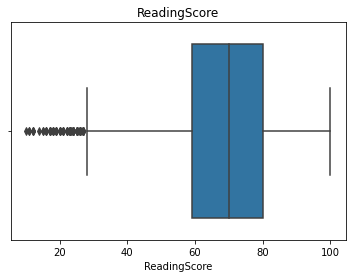

In [83]:
sns.boxplot(data=df,x='ReadingScore')
plt.title('ReadingScore')

Text(0.5, 1.0, 'WritingScore')

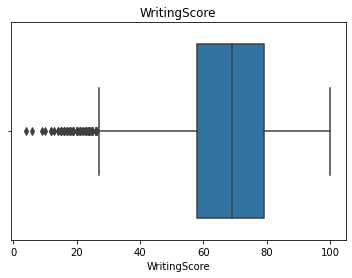

In [84]:
sns.boxplot(data=df,x='WritingScore')
plt.title('WritingScore')

Text(0.5, 1.0, 'MathScore')

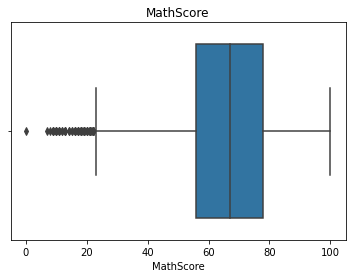

In [85]:
sns.boxplot(data=df,x='MathScore')
plt.title('MathScore')

#### From the above charts, its obvious that math is the toughest subject

###  Scores wrt gender

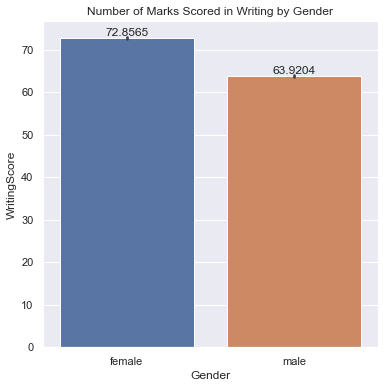

In [104]:
ax = sns.barplot(x="Gender", y="WritingScore", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Marks Scored in Writing by Gender")
sns.set(rc={"figure.figsize":(5,5)})

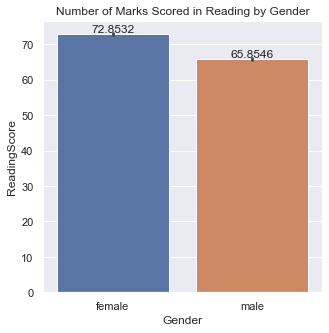

In [105]:
ax=sns.barplot(x="Gender", y="ReadingScore", data=df)
ax.bar_label(ax.containers[0])
plt.title("Number of Marks Scored in Reading by Gender")
sns.set(rc={"figure.figsize":(5,5)})

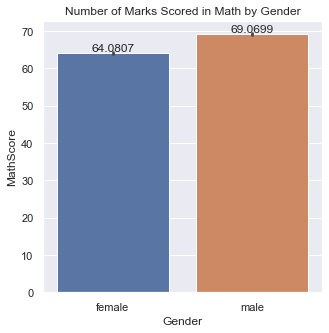

In [106]:
ax = sns.barplot(x="Gender", y="MathScore", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Marks Scored in Math by Gender")
sns.set(rc={"figure.figsize":(5,5)})

#### From above charts, females scores more than males except in Math

## 5. Conclusion

#### From the analysis, we have arrived at conclusions as follows:
    Data has more number of female students.
    Females students lead in average for writing and reading scores than male students.
    Math is the difficult subject.
    Male students has good scores compared to females in math.
    Students mostly travel by school bus than private vehicles.
    Student born to parents with good education, seem to score more marks than others.